In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
inspector = inspect(engine)

In [9]:
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23')

Text(0, 0.5, 'inches')

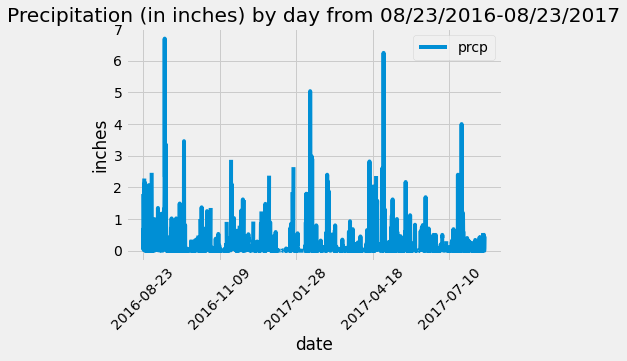

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# most_recent = session.query(Measurement.date).\
#     orderby(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date=dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_results, columns = ['date', 'prcp'])
# prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df.sort_values('date', inplace=True)
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data

date =prcp_df.date
prcp = prcp_df.prcp

ax = prcp_df.plot(x='date', y='prcp',rot=45, title ="Precipitation (in inches) by day from 08/23/2016-08/23/2017")
ax.set_xlabel("date")
ax.set_ylabel("inches")


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station)

total_stations.count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_low = session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station =="USC00519281").all()
station_low

[('USC00519281', 54.0)]

In [24]:
station_high = session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station =="USC00519281").all()
station_high

[('USC00519281', 85.0)]

In [25]:
station_avg = session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.station =="USC00519281").all()
station_avg

[('USC00519281', 71.66378066378067)]

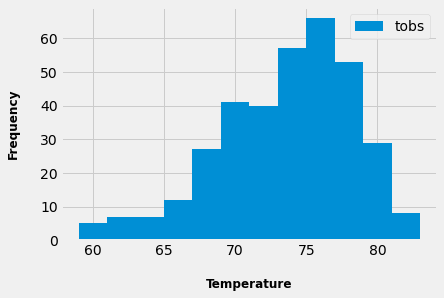

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_results= session.query(Measurement.date,Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date>= query_date).all()


station_df = pd.DataFrame(station_temp_results, columns = ['date', 'tobs'])

station_hist = station_df.hist(bins=12,legend=True)

station_hist = station_hist[0]
for x in station_hist:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Temperature", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

# Close session

In [22]:
# Close Session
session.close()